# Air Quality Index Prediction Model - AICTE

## Introduction
- In this, we aim to predict the Air Quality Index (AQI) based on various air quality parameters.
- The dataset contains information about different pollutants and their concentrations in various cities over time.
- The goal is to build a predictive model that can estimate AQI based on these parameters.

##   Installing Required Libraries
```python
!pip install numpy pandas matplotlib seaborn scikit-learn
```
## 1. Installing and Importing Required Libraries
To work with data and build the AQI prediction model, we need the following libraries:
- **numpy** and **pandas** for data manipulation
- **matplotlib** and **seaborn** for visualization
- **scikit-learn** for building the machine learning model


## 2. Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

# Load the dataset
data_frame = pd.read_csv("air quality data.csv")
data_frame.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


## 3. Initial Data Exploration

In [2]:
# To check the shape of the dataset - no.of rows, columns
data_frame.shape

# To check the data types and missing values
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [3]:
# Check for duplicate rows
data_frame.duplicated().sum()

# Check for missing values
data_frame.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

## 4. Handling Missing Values

In [4]:
# Drop the rows where 'AQI' has missing values
data_frame.dropna(subset=['AQI'], inplace=True)
data_frame.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
Date              0
City              0
AQI               0
AQI_Bucket        0
dtype: int64

In [5]:
# Dataset Shape after droping missing values rows
data_frame.shape

(24850, 16)

In [6]:
# Summary of statistics in the dataset (T - transpose rows to columns & vise versa)
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [7]:
# Percentage of null values
null_values_percentage = (data_frame.isnull().sum()/data_frame.isnull().count()*100).sort_values(ascending=False)
null_values_percentage

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
Date           0.000000
City           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

#### Key Considerations
- **Xylene** has the highest percentage of missing values -- 61.86%
- **PM10** and **NH3** has missing values of 28 - 26 %

# Week 2 - Visualization
## 5. Visaulization

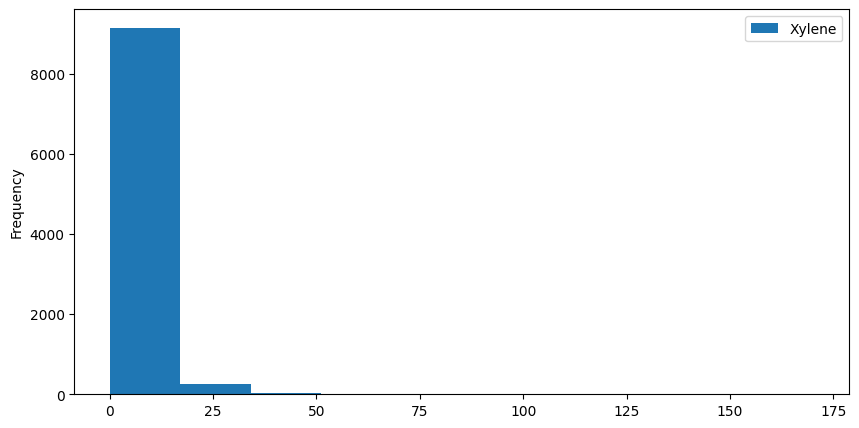

In [8]:
# Univariate Analysis - use 1 variable
data_frame['Xylene'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

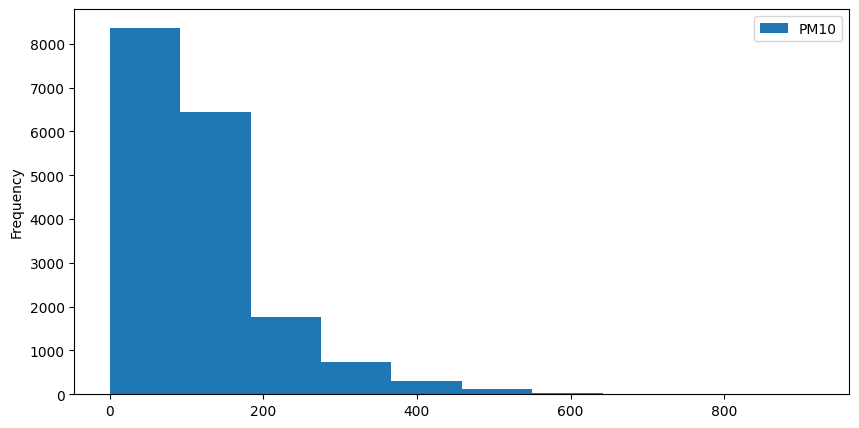

In [9]:
data_frame['PM10'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

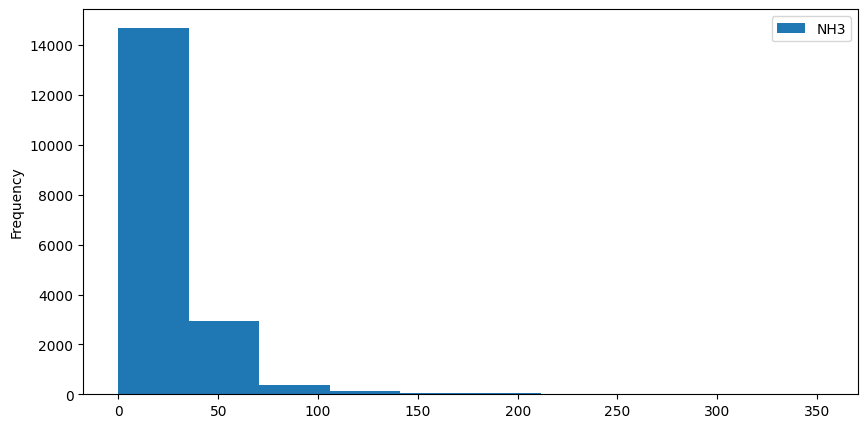

In [10]:
data_frame['NH3'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

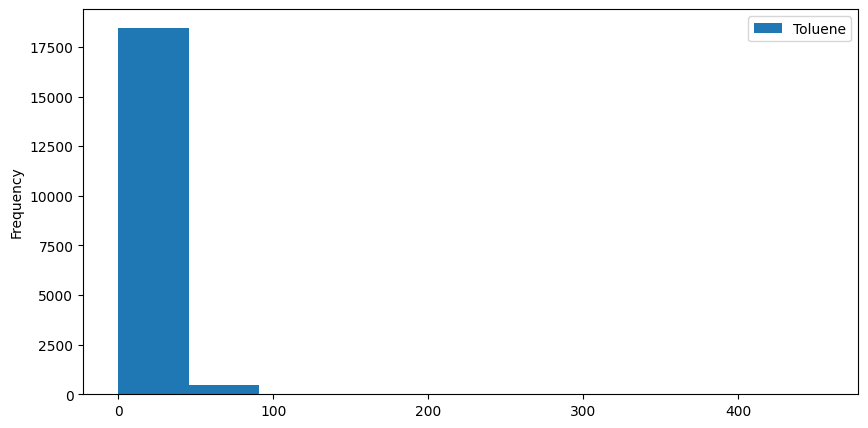

In [11]:
data_frame['Toluene'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

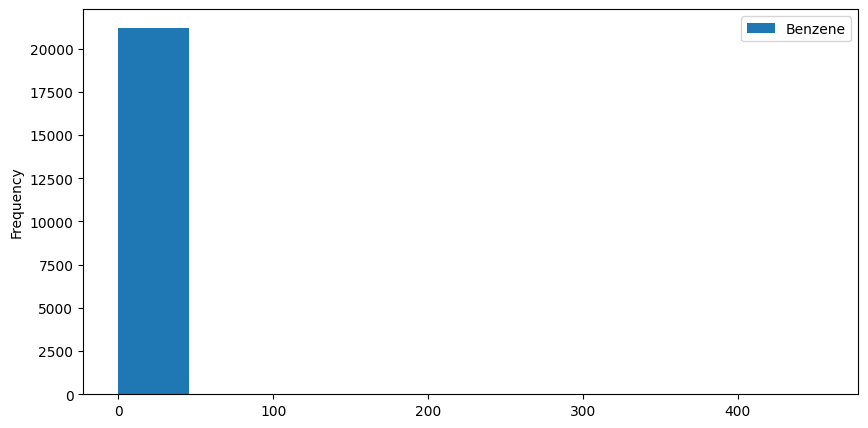

In [12]:
data_frame['Benzene'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

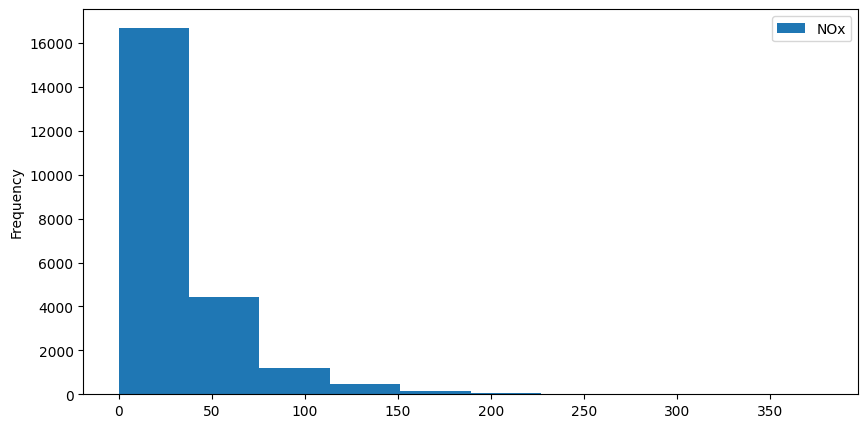

In [13]:
data_frame['NOx'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

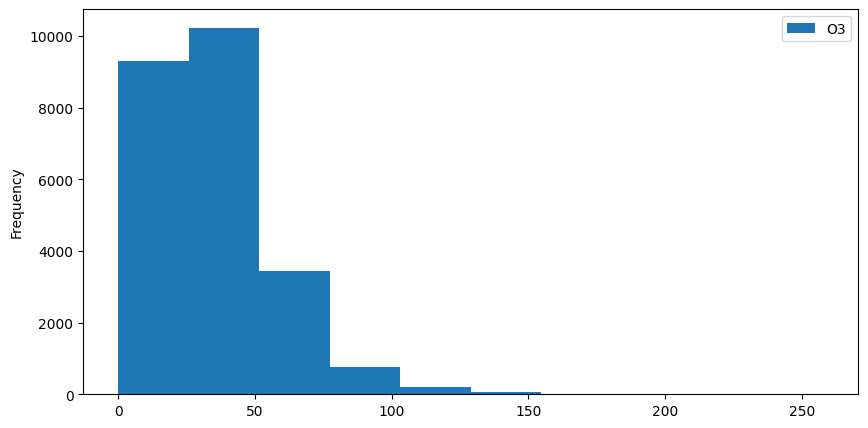

In [14]:
data_frame['O3'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

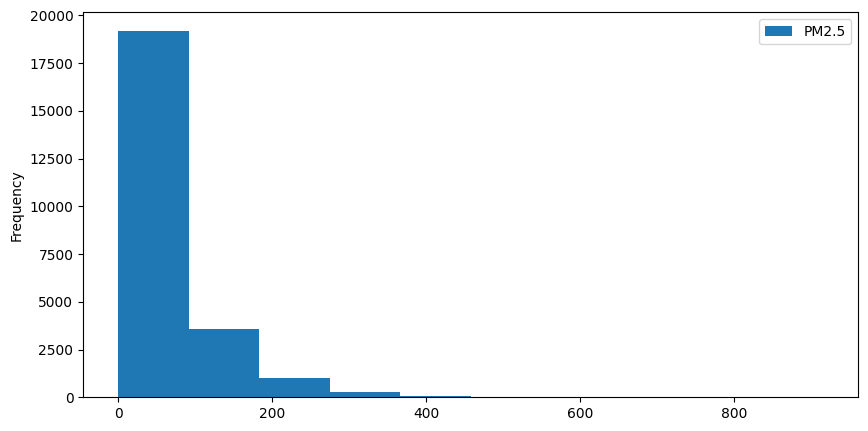

In [15]:
data_frame['PM2.5'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

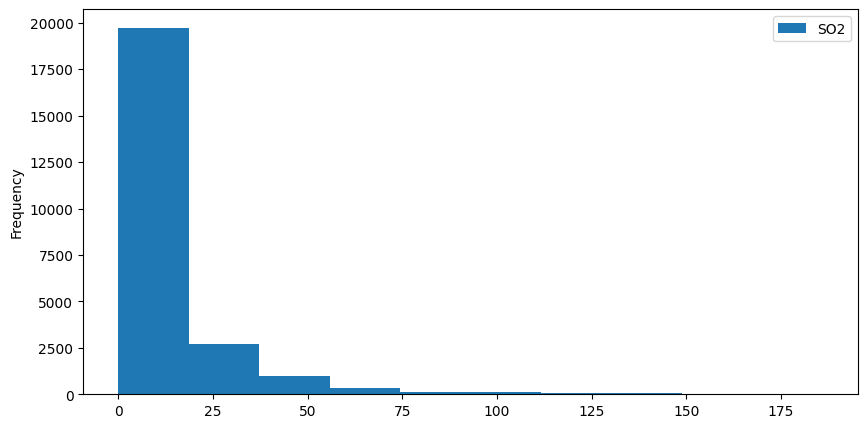

In [16]:
data_frame['SO2'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

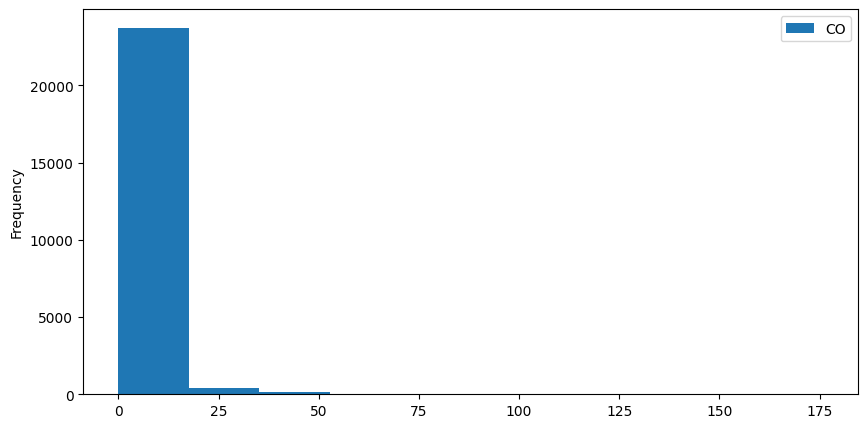

In [17]:
data_frame['CO'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

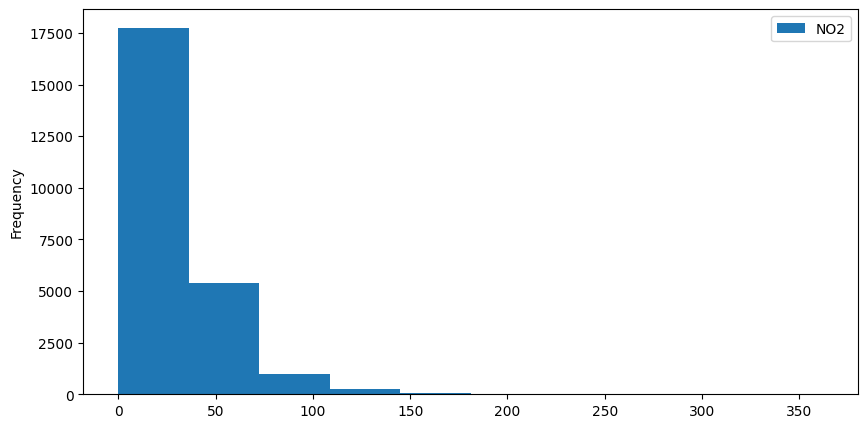

In [18]:
data_frame['NO2'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

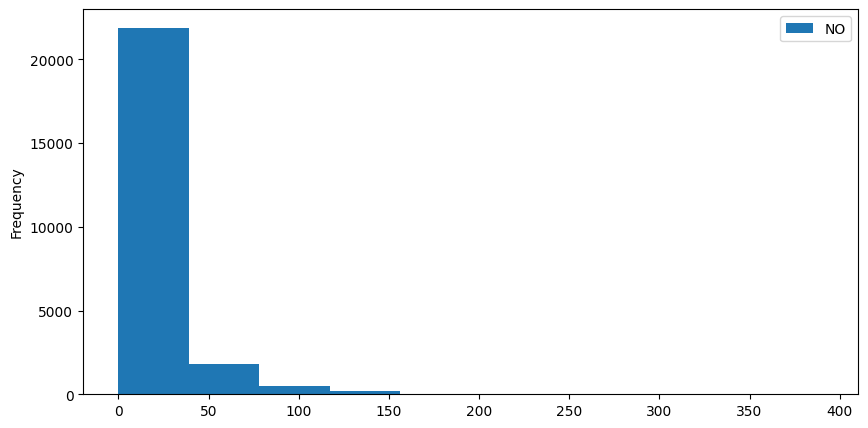

In [19]:
data_frame['NO'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

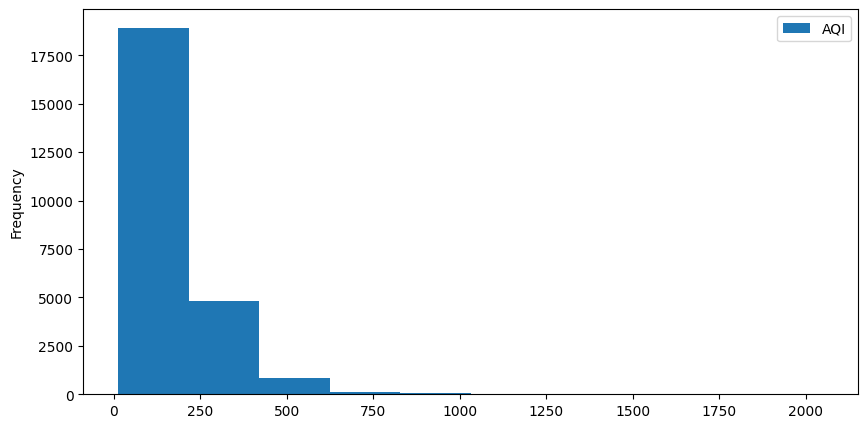

In [20]:
data_frame['AQI'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

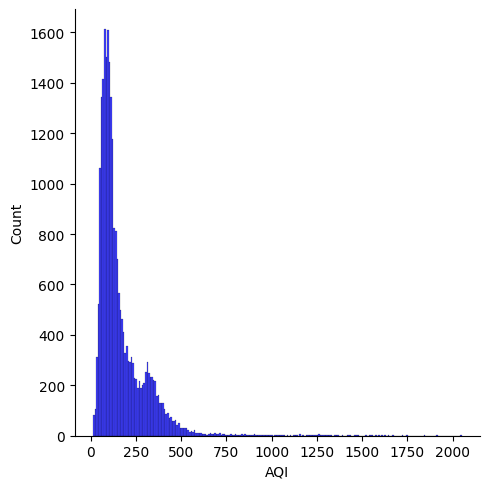

In [21]:
# Distribution of AQI from 2015 to 2020
sns.displot(data_frame, x='AQI', color='blue')
plt.show()

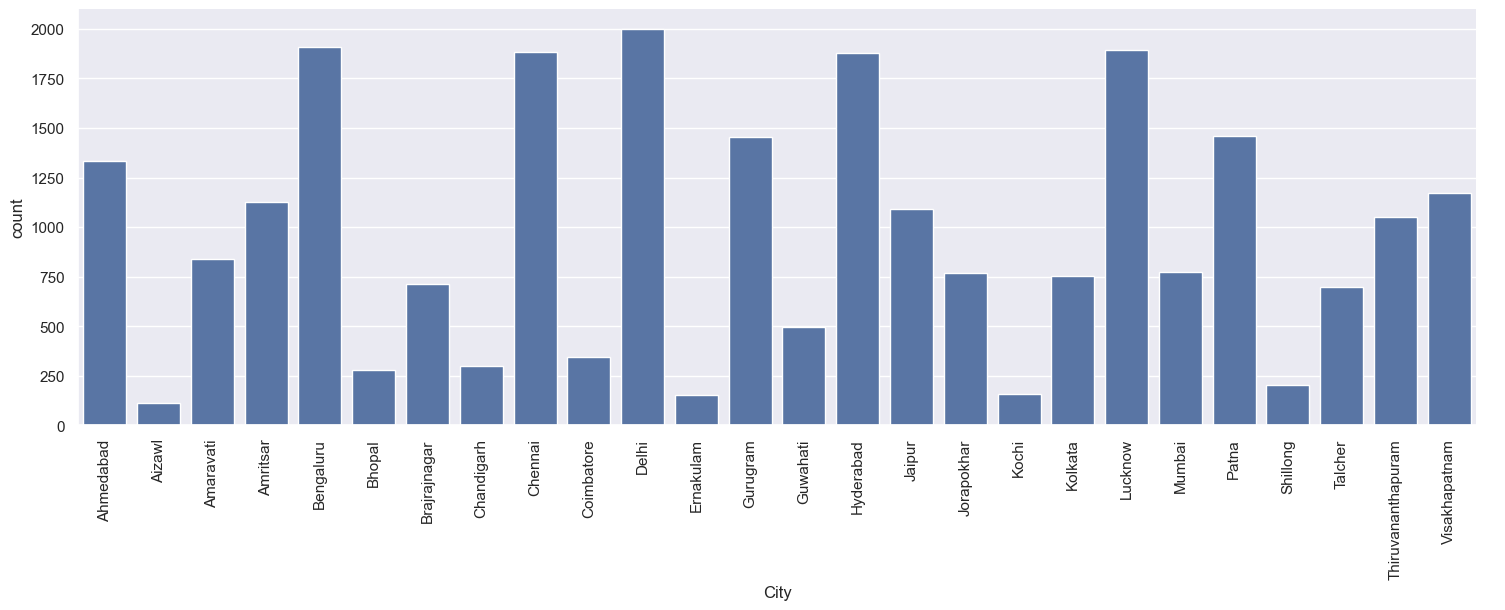

In [22]:
# Bivariate Analysis
sns.set_theme(style='darkgrid')
graph = sns.catplot(x='City', kind='count', data=data_frame, height=5, aspect=3)
graph.set_xticklabels(rotation=90)

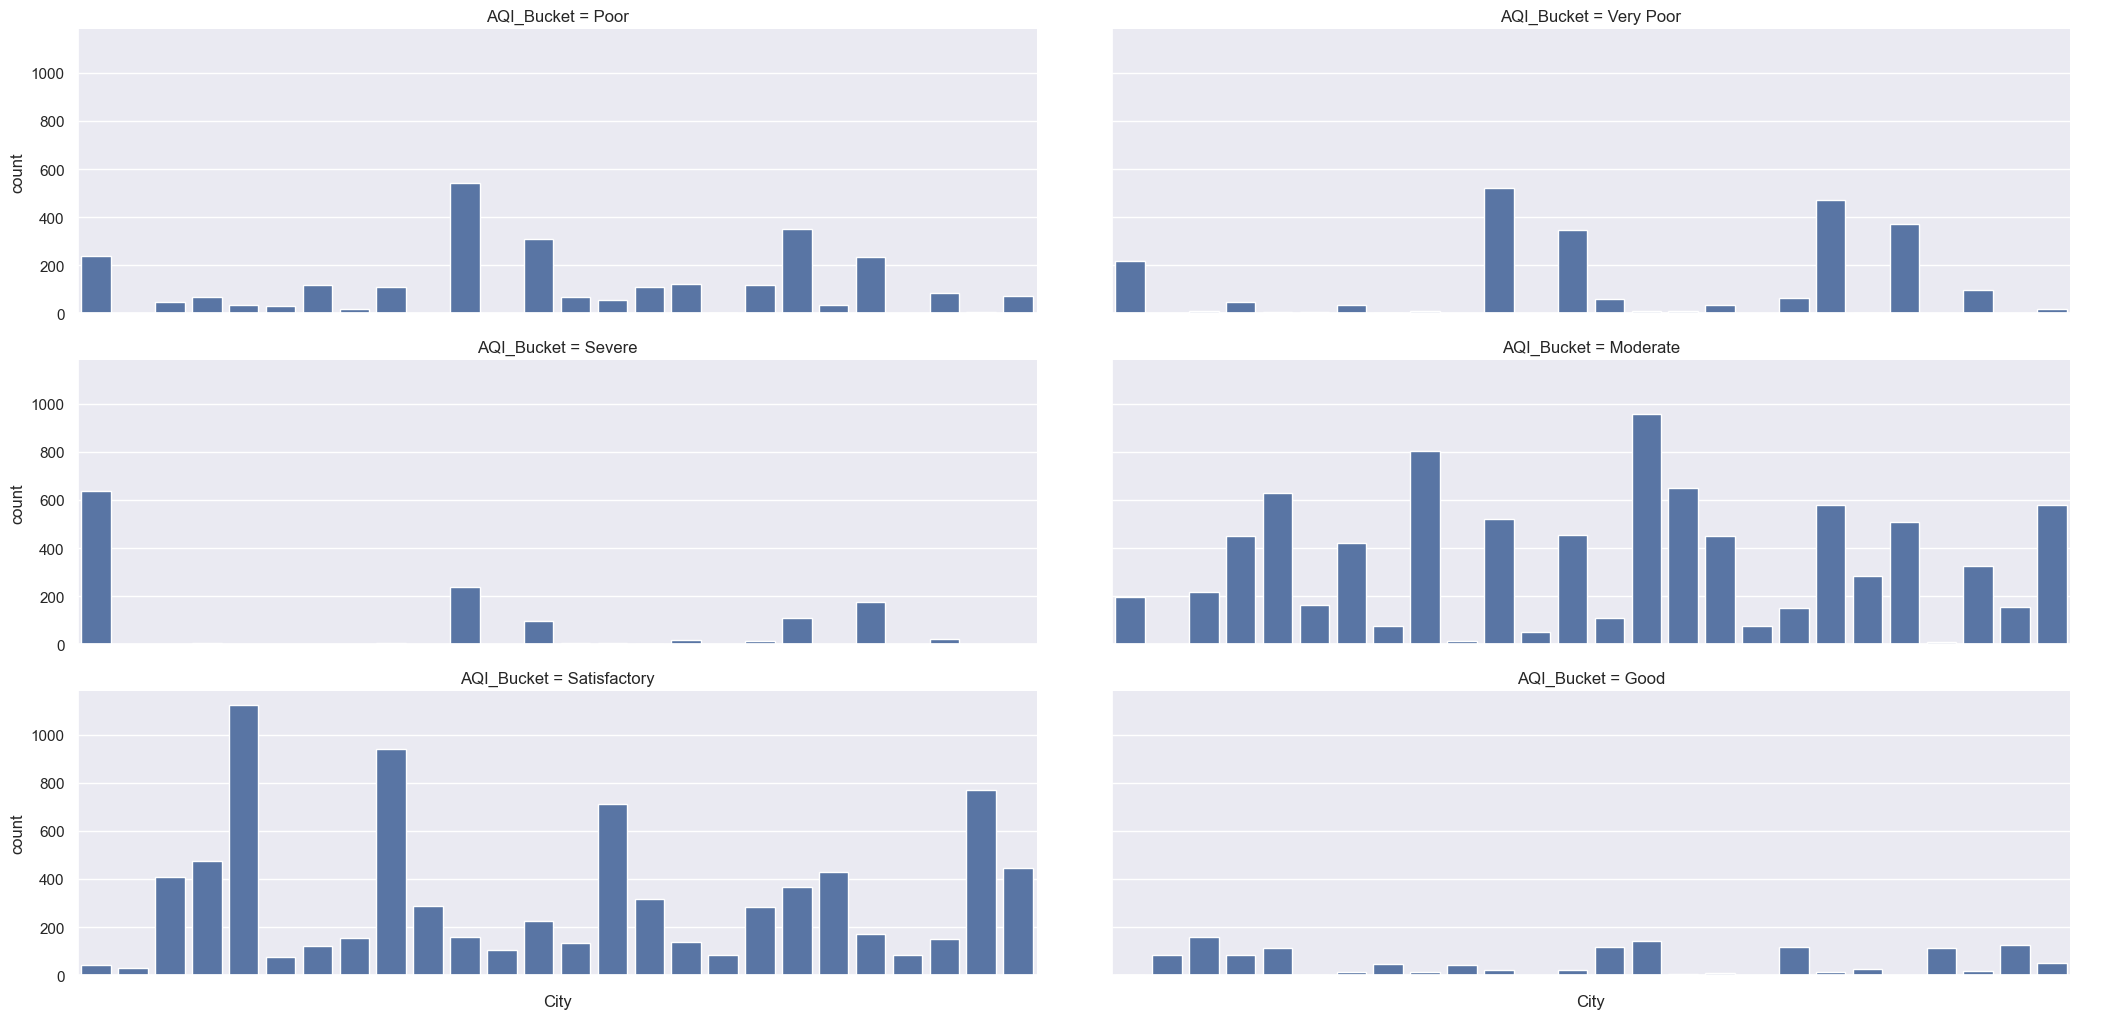

In [23]:
sns.set_theme(style='darkgrid')
graph = sns.catplot(x='City', kind='count', data=data_frame, col='AQI_Bucket', col_wrap=2, height=3.5, aspect=3)
graph.set_xticklabels(rotation=90)

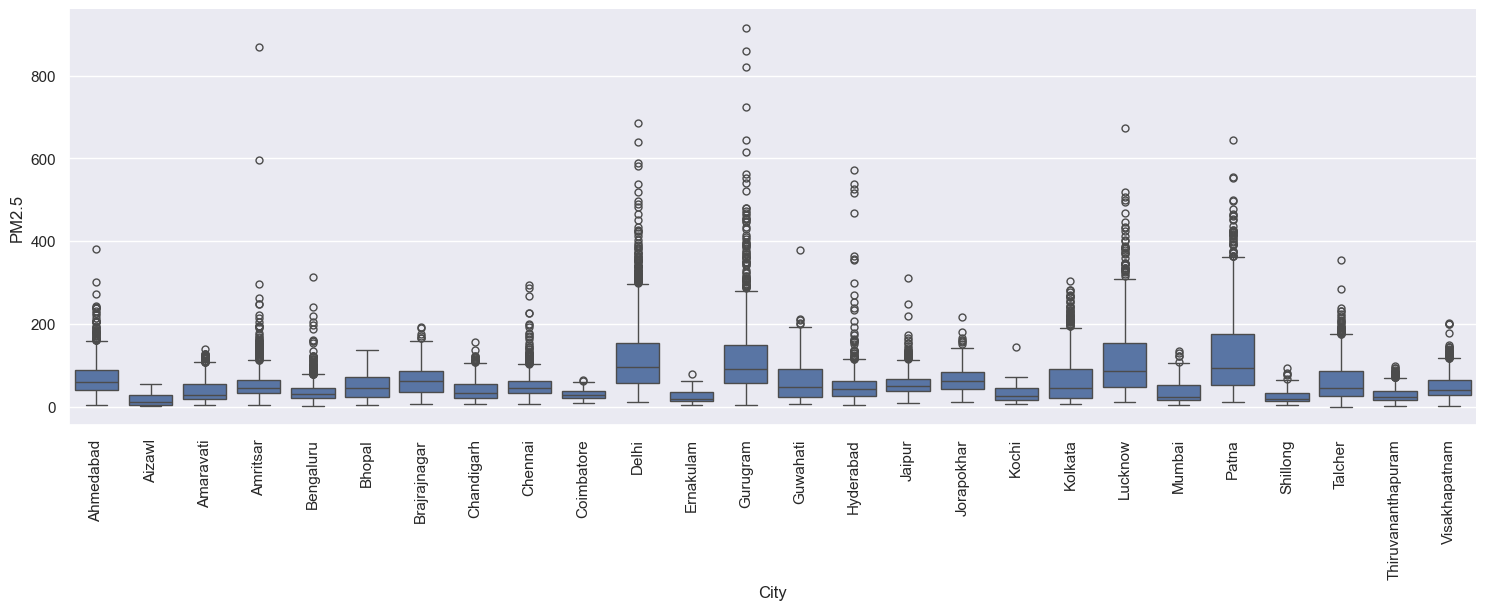

In [24]:
graph1 = sns.catplot(x='City', y='PM2.5', kind='box', data=data_frame, height=5, aspect=3)
graph1.set_xticklabels(rotation=90)

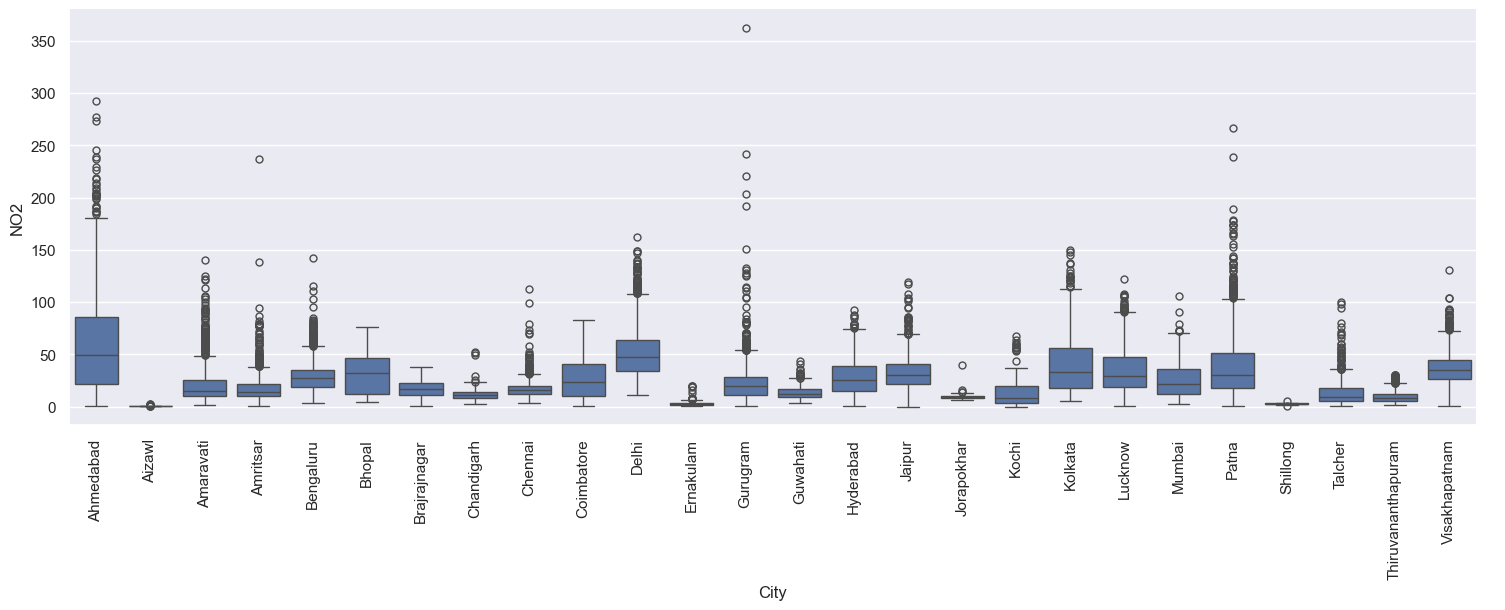

In [25]:
graph1 = sns.catplot(x='City', y='NO2', kind='box', data=data_frame, height=5, aspect=3)
graph1.set_xticklabels(rotation=90)

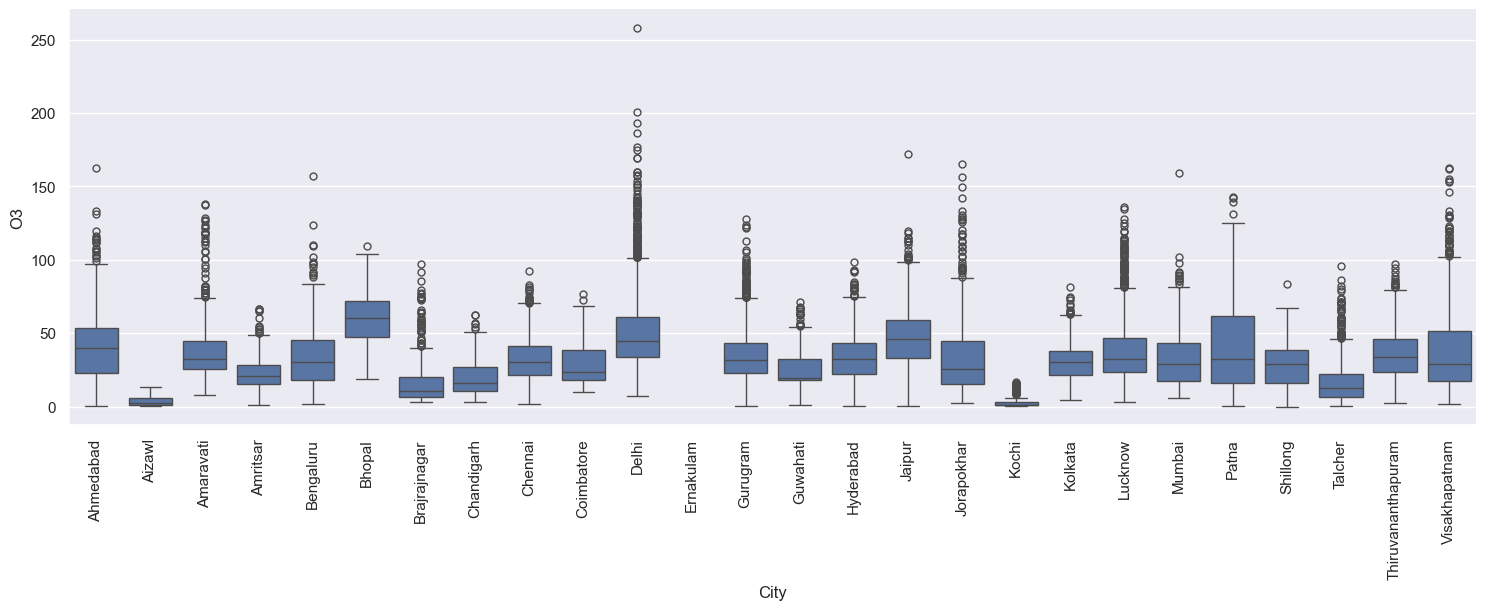

In [26]:
graph1 = sns.catplot(x='City', y='O3', kind='box', data=data_frame, height=5, aspect=3)
graph1.set_xticklabels(rotation=90)

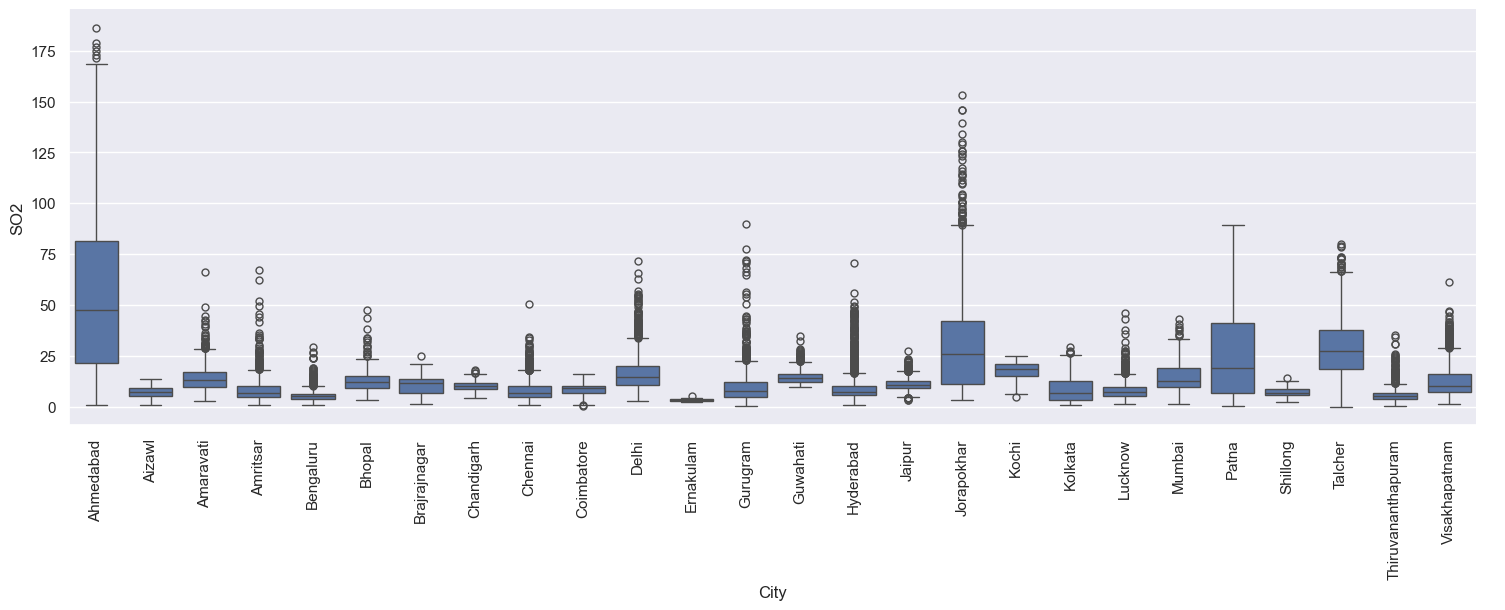

In [27]:
graph1 = sns.catplot(x='City', y='SO2', kind='box', data=data_frame, height=5, aspect=3)
graph1.set_xticklabels(rotation=90)

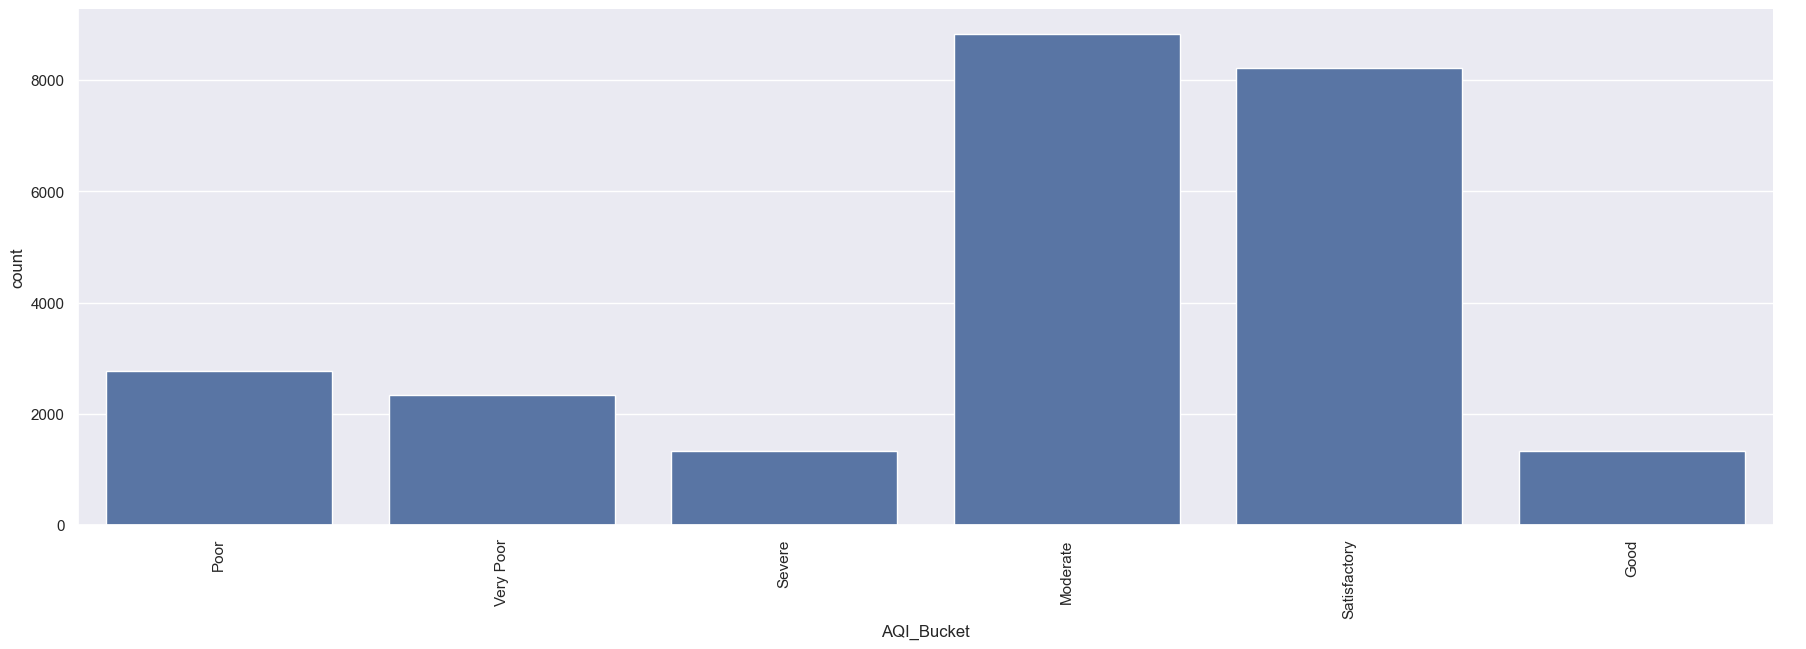

In [28]:
graph1 = sns.catplot(x='AQI_Bucket', kind='count', data=data_frame, height=6, aspect=3)
graph1.set_xticklabels(rotation=90)

In [29]:
# To check the null values
data_frame.isnull().sum().sort_values(ascending=False)

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
Date              0
City              0
AQI               0
AQI_Bucket        0
dtype: int64

In [30]:
# Finding mean for data correction
data_frame.describe().loc['mean']

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [31]:
data_frame = data_frame.replace({
    "PM2.5":{np.nan:67.476613},
    "PM10":{np.nan:118.454435},
    "NO":{np.nan:17.622421},
    "NO2":{np.nan:28.978391},
    "NOx":{np.nan:32.289012},
    "NH3":{np.nan:23.848366},
    "CO":{np.nan:2.345267},
    "SO2":{np.nan:14.362933},
    "O3":{np.nan:34.912885},
    "Benzene":{np.nan:3.458668},
    "Toluene":{np.nan:9.525714},
    "Xylene":{np.nan:3.588683}
})

In [32]:
# To check for null values
data_frame.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [33]:
# To remove useless columns
data_frame = data_frame.drop(['AQI_Bucket'], axis=1)

In [34]:
data_frame.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0
29,Ahmedabad,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0
30,Ahmedabad,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0
31,Ahmedabad,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0
32,Ahmedabad,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0


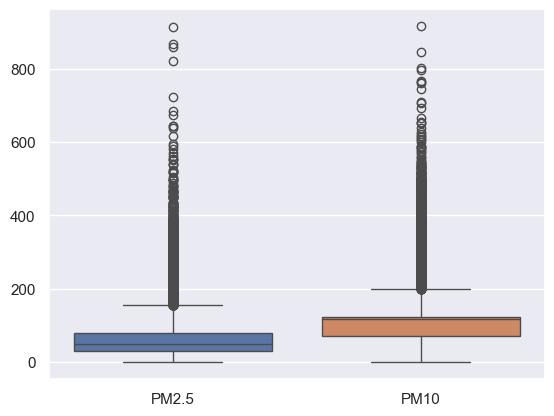

In [35]:
sns.boxplot(data=data_frame[['PM2.5', 'PM10']])
plt.show()

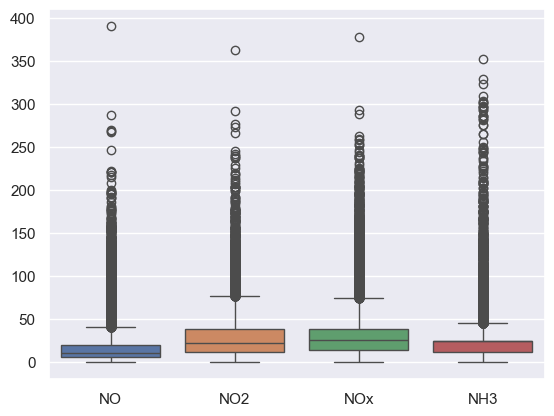

In [36]:
sns.boxplot(data=data_frame[['NO', 'NO2', 'NOx', 'NH3']])
plt.show()

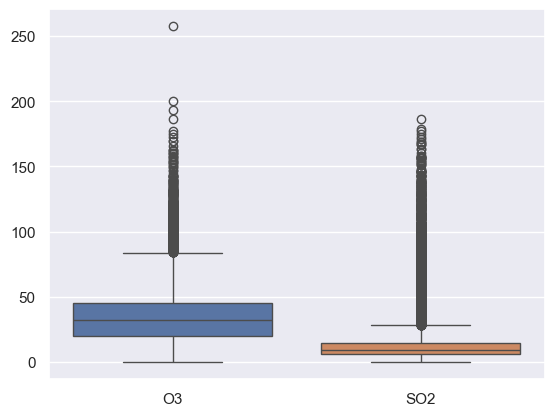

In [37]:
sns.boxplot(data=data_frame[['O3', 'SO2']])
plt.show()

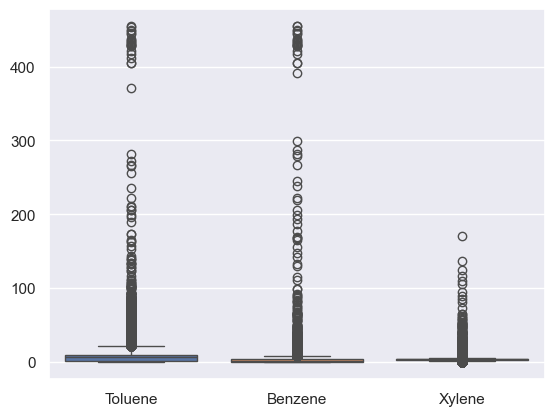

In [38]:
sns.boxplot(data=data_frame[['Toluene', 'Benzene', 'Xylene']])
plt.show()

In [39]:
# IQR Method - Q3, Q1
def replace_outliers(df):
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lb = Q1 - 1.5 * IQR
        ub = Q3 + 1.5 * IQR
        df[column] = df[column].apply(lambda x: Q1 if x<lb else (Q3 if x>ub else x))
    return df

In [40]:
df = replace_outliers(data_frame)

In [41]:
df.describe().T
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,Ahmedabad,2015-01-29,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000,209.0
29,Ahmedabad,2015-01-30,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000,328.0
30,Ahmedabad,2015-01-31,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683,208.0
31,Ahmedabad,2015-02-01,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,3.588683,208.0
32,Ahmedabad,2015-02-02,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.46,0.06,3.588683,208.0


<Axes: >

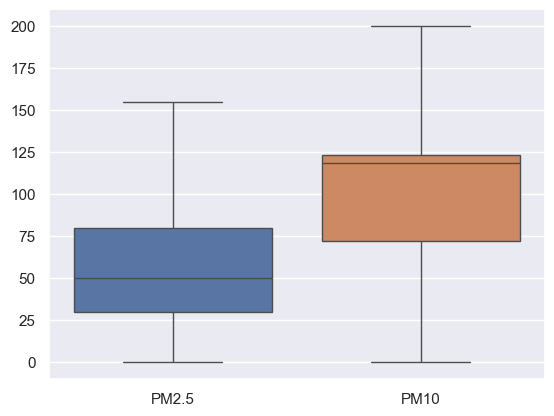

In [42]:
sns.boxplot(data=df[['PM2.5', 'PM10']])

<Axes: >

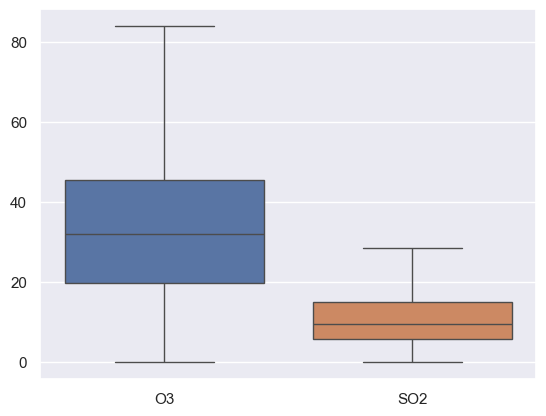

In [43]:
sns.boxplot(data=df[['O3', 'SO2']])

<Axes: >

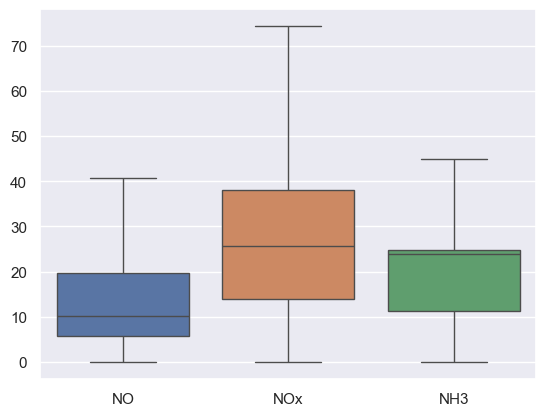

In [44]:
sns.boxplot(data=df[['NO', 'NOx', 'NH3']])

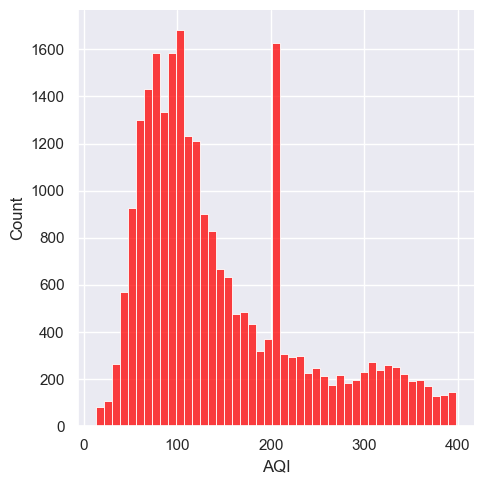

In [45]:
sns.displot(df, x='AQI', color='red')
plt.show()

In [46]:
df1 = df.drop(columns=['City'], axis=1)

In [47]:
df1.head()

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,2015-01-29,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000,209.0
29,2015-01-30,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000,328.0
30,2015-01-31,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683,208.0
31,2015-02-01,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,3.588683,208.0
32,2015-02-02,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.46,0.06,3.588683,208.0


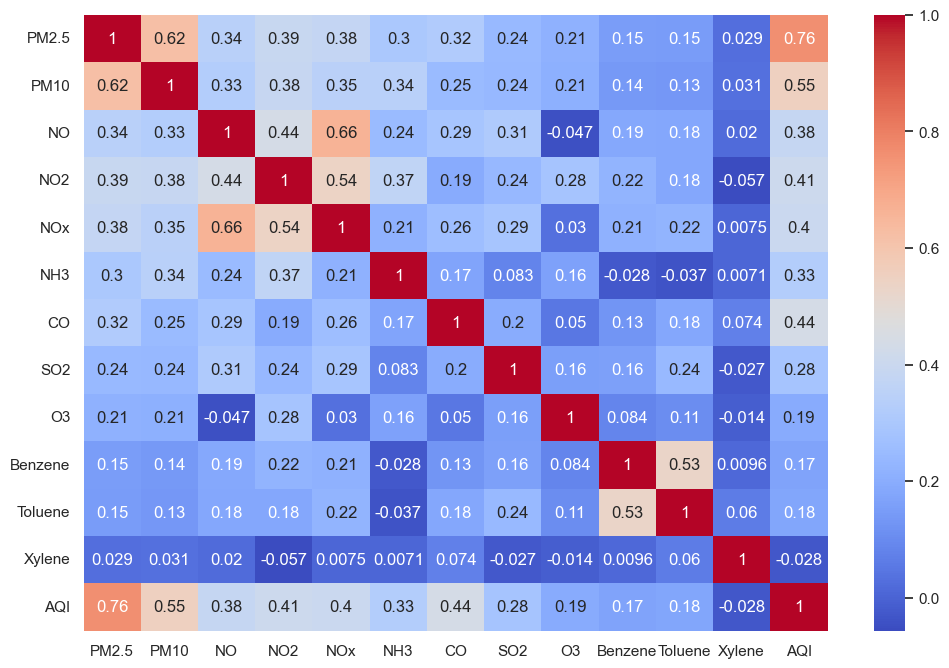

In [48]:
# Multivariate Analysis - Heat Map
plt.figure(figsize=(12,8))
sns.heatmap(df1.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.show()